## Logistic Regression using Gradient Descent 

In this notebook we use the concepts from Example 1.5.2 (pg.25) & Example 5.2.16 (pg.136) in the textbook to build a e-mail spam classifier.

In [18]:

# This block of code activates the right project environment 
# and the required packages 
using Pkg
Pkg.activate(".")
using CSV
using DataFrames
using PyPlot

  Activating project at `~/Documents/CODE/ACN6348-lab`


### Loading the Dataset

In [19]:
path = joinpath(pwd(),"data","spam.csv")
spam = CSV.read(path,DataFrame)
first(spam,4) # show only first four rows

,crl.tot,dollar,bang,money,n000,make,yesno
,Int64,Float64,Float64,Float64,Float64,Float64,String1
1,278,0.0,0.778,0.0,0.0,0.0,y
2,1028,0.18,0.372,0.43,0.43,0.21,y
3,2259,0.184,0.276,0.06,1.16,0.06,y
4,191,0.0,0.137,0.0,0.0,0.0,y


We'll normalize the `crl.tot` column 

In [20]:
spam.crlnormalized = spam[:,"crl.tot"] ./ maximum(spam[:,"crl.tot"])
select!(spam, Not("crl.tot"));
first(spam,4)

,dollar,bang,money,n000,make,yesno,crlnormalized
,Float64,Float64,Float64,Float64,Float64,String1,Float64
1,0.0,0.778,0.0,0.0,0.0,y,0.0175494
2,0.18,0.372,0.43,0.43,0.21,y,0.0648949
3,0.184,0.276,0.06,1.16,0.06,y,0.142605
4,0.0,0.137,0.0,0.0,0.0,y,0.0120573


#### Dataset Description 

- `crl.tot`: total length of uninterrupted sequences of capitals
- `dollar`: Occurrences of the dollar sign, as percent of total number of characters
- `bang`: Occurrences of ‘!’, as percent of total number of characters
- `money`: Occurrences of ‘money’, as percent of total number of words
- `n000`: Occurrences of the string ‘000’, as percent of total number of words
- `make`: Occurrences of ‘make’, as a percent of total number of words
- `yesno`: outcome variable, a factor with levels n not spam, y spam

The next step in our workflow is separate the input patter $\mathbf{S}$ from the target variable $y$

In [21]:
S = select(spam, Not(:yesno)) |> Matrix
y = spam.yesno .== "y";

### Probability Model

A logistic regression probability model is given by the formula:

$$\ddot{p}(s,\theta) = {[1 + \exp(-\ddot{y}(s,\theta))]}^{-1}$$

In [22]:
phat(S,θ) = (1 .+ exp.(-ydotdot(S,θ))).^-1

phat (generic function with 1 method)

where 
$$\ddot{y}(s,\theta) = \theta^T {[s^T 1]}^T$$

In [23]:
ydotdot(S,θ) = [S ones(length(y))]*θ

ydotdot (generic function with 1 method)

### Objective Function

The cost function $c$ is chosen such that 

$$c([y,s],\theta) = -y log\ddot{p}(s,\theta) - (1 -y)log(1-\ddot{p}(s,\theta))$$

In [24]:
c(y,S,θ) =(-y .* log.(phat(S,θ))) - ((1 .- y) .* log.(1 .- phat(S,θ)))

c (generic function with 1 method)

and loss function $$l_n(\theta) = -(1/n) \Sigma_{i=1}^n c([y_i,s_i],\theta)$$

In [25]:
lₙ(θ) = - 1/n * sum(c(y,S,θ))

lₙ (generic function with 1 method)

### Gradient 

Refer to Example 5.2.16 (pg.136) for more details on taking the derivatives of logistic regression objective function.

$$\frac{dc_i}{d\mathbf{\theta}} = -(y_i - \ddot{y_i})[s_i^T, 1]$$

In [26]:
∇c(θ) = vec(-(y - ydotdot(S,θ))' *[S ones(length(y))])

∇c (generic function with 1 method)

### Gradient Descent Algorithm 

Implementing a supervised learning gradient descent using Algorithm 1.5.1 (pg.23)

In [27]:
function gradient_descent(θ;max_iter = 200, gamma = 0.1)
    gradhist = []
    t = 0 
    gradnorm = Inf 
    while gradnorm >= 10e-4 && t < max_iter
        gt = ∇c(θ)
        θ = θ .- gamma.*gt
        gradnorm = maximum(abs.(gt))
        t = t+1 
        println("Iterations: $t \t gradnorm = $gradnorm")
        gradhist =[gradhist;gradnorm]
    end
    return θ, gradhist
end

gradient_descent (generic function with 1 method)

Initializing theta 

In [28]:
initialtheta = zeros(size(S)[2]+1);

Now let's run our gradient descent algorithm to find the values that minimize our cost function

In [29]:
thetas, gradhist = gradient_descent(initialtheta,  gamma = 9.89e-5, max_iter=100);

Iterations: 1 	 gradnorm = 1813.0
Iterations: 2 	 gradnorm = 812.2174883151084
Iterations: 3 	 gradnorm = 358.69969220030225
Iterations: 4 	 gradnorm = 196.21833468769532
Iterations: 5 	 gradnorm = 172.92168920738123
Iterations: 6 	 gradnorm = 156.8261200598081
Iterations: 7 	 gradnorm = 144.35468974522144
Iterations: 8 	 gradnorm = 133.86908910550454
Iterations: 9 	 gradnorm = 124.6049709331153
Iterations: 10 	 gradnorm = 116.19353001126609
Iterations: 11 	 gradnorm = 108.44625916358795
Iterations: 12 	 gradnorm = 101.25790736955904
Iterations: 13 	 gradnorm = 94.56257031179726
Iterations: 14 	 gradnorm = 88.31369705506509
Iterations: 15 	 gradnorm = 82.47488678946951
Iterations: 16 	 gradnorm = 77.01557255010364
Iterations: 17 	 gradnorm = 71.90893275021362
Iterations: 18 	 gradnorm = 67.13082935928384
Iterations: 19 	 gradnorm = 62.65922768188444
Iterations: 20 	 gradnorm = 58.47384857231593
Iterations: 21 	 gradnorm = 55.884677136082004
Iterations: 22 	 gradnorm = 53.71386398356221

### Visualizing the `gradnorm`

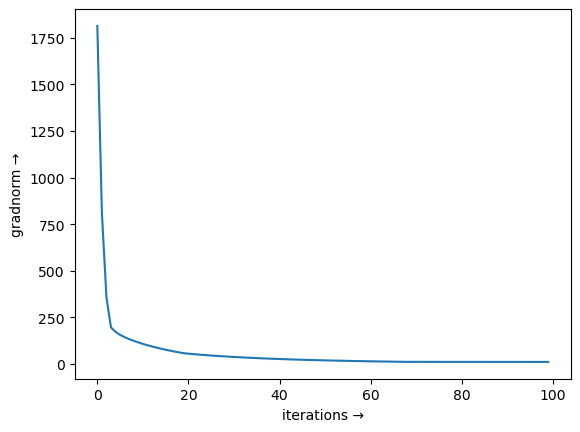

In [30]:
figure()
plot(gradhist)
xlabel("iterations →")
ylabel("gradnorm →");

Learned Parameter

In [31]:
thetas

7-element Vector{Float64}:
 0.369880977281267
 0.11210971231317349
 0.18520869081297514
 0.35009910194857186
 0.04622576150747663
 0.13684729652015795
 0.2755780132702609

## Exercise 

1. Re-run the above binary logistic regression example with a dataset of your choice. To run this notebook with your own data, you only need to change two lines of codes:
```julia
path = joinpath(pwd(),"data","spam.csv")
```
If you drop your dataset file in the "data" folder, then you only need to change `spam.csv` part to the your dataset file name. 

The next is specifying your input patterns and the target variable

```julia
S = select(spam, Not(:yesno)) |> Matrix
y = spam.yesno .== "y";
```
Instead of `yesno`, you will specify the column-name in your dataset that corresponds to your outcome variable. 

2. Create a new notebook and implement a simple non-linear regression with radial basis output function. Refer the textbook to implement the objective function and derive its gradient. You can reuse the `gradient_descent` algorithm implementation from this example for the assignment. 